**Nama** : Ardhien Fadhillah Suhartono

**NIM** :1103204137

**Kelas** : TK4402

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd

# Ganti 'file_path.csv' dengan jalur file CSV sesuai kebutuhan Anda
file_path = '/content/gdrive/MyDrive/Dataset/Social_Network_Ads.csv'

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(file_path)

# Tampilkan DataFrame
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
# Mengubah tipe data kolom 'EstimatedSalary', 'Age' dan 'Purchased' menjadi float
df['EstimatedSalary'] = df['EstimatedSalary'].astype(float)
df['Purchased'] = df['Purchased'].astype(float)
df['Age'] = df['Age'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 15.8+ KB


In [12]:
# Import library
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

# Check if the dataframe is empty
if df.empty:
    print("Error: DataFrame is empty.")
else:
    print("DataFrame information:")
    print(df.info())  # Print information about the DataFrame

    # Check for missing values in the dataframe
    if df.isnull().values.any():
        print("Error: DataFrame contains missing values. Please handle missing values before proceeding.")
    else:
        # Assuming 'EstimatedSalary' column contains the features
        estimatedSalary_values = df['EstimatedSalary'].values

        # Print information about the 'Apps' column
        print("EstimatedSalary column information:")
        print(f"Shape: {estimatedSalary_values.shape}")
        print(f"Size: {estimatedSalary_values.size}")

        # Handle missing values in the data
        # You can choose another strategy like 'mean', 'median', or 'most_frequent' based on your data
        imputer = SimpleImputer(strategy='mean')

        # Reshape the 'EstimatedSalary' column, considering the appropriate shape based on your data structure
        # Modify the reshape dimensions based on your understanding of the data
        X = imputer.fit_transform(estimatedSalary_values.reshape(-1, 1))  # Adjust the reshape dimensions as needed

        y = df['Age'].values

        # Ensure there is at least one sample after imputation
        if X.shape[0] > 0:
            # Modify test_size to a reasonable value
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Initialize LinearSVR model with hyperparameters
            linear_svr_model = LinearSVR(C=1.0, epsilon=0.1)

            # Train the model
            linear_svr_model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = linear_svr_model.predict(X_test)

            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            print(f'Mean Squared Error: {mse}')

            # Now the LinearSVR model with specified hyperparameters is trained and tested.
            # You can use it to make predictions on new data.
        else:
            print("Error: No samples after imputation.")

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 15.8+ KB
None
EstimatedSalary column information:
Shape: (400,)
Size: 400
Mean Squared Error: 363.9062407499435


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
# Import library
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Data
# Gantilah bagian ini dengan data Anda
X = df['EstimatedSalary'].values.reshape(-1, 1)
y = df['Age'].values

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inisialisasi model LinearSVR dengan hyperparameter tertentu
linear_svr_model = LinearSVR(C=1.0, epsilon=0.1)

# Melatih model
linear_svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = linear_svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Sekarang model LinearSVR dengan hyperparameter yang telah ditentukan sudah dilatih dan diuji.
# Anda dapat menggunakannya untuk membuat prediksi pada data baru.

Mean Squared Error: 4884.3685986801


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


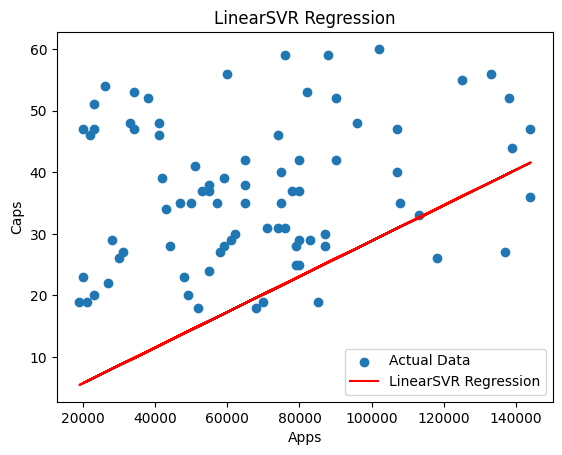

In [14]:
import matplotlib.pyplot as plt

# Ensure df has enough rows
if len(df) < 2:
    print("Error: Not enough data for training and testing sets.")
else:
    # Modify test_size to a reasonable value
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model LinearSVR dengan hyperparameter tertentu
    linear_svr_model = LinearSVR(C=1.0, epsilon=0.1)

    # Melatih model
    linear_svr_model.fit(X_train, y_train)

    # Visualisasi data dan model
    plt.scatter(X_test, y_test, label='Actual Data')  # Use X_test and y_test for visualization
    plt.plot(X_test, linear_svr_model.predict(X_test), color='red', label='LinearSVR Regression')

    # Label sumbu
    plt.xlabel('Apps')
    plt.ylabel('Caps')

    # Menambahkan judul
    plt.title('LinearSVR Regression')

    # Menampilkan legenda
    plt.legend()

    # Menampilkan plot
    plt.show()

In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Instantiate your SVR model
svr_model = SVR()

# Define the hyperparameter grid
param_grid = {
    'kernel': ['rbf'],
    'C': [10, 100, 1000],
    'gamma': [0.5, 0.05, 0.005]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 168.07004772430537


In [16]:
new_model = SVR(C=10, gamma=0.005, kernel='rbf')
new_model.fit(X,y)

SVR(C=10, gamma=0.005)

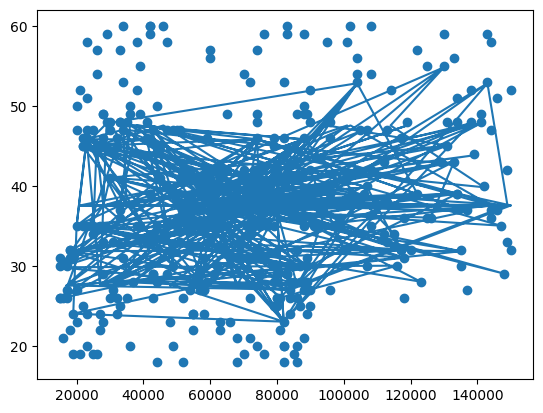

In [17]:
#visualisasikan model
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, new_model.predict(X))